 Run the next box to disable auto-scrolling of large figures:

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Run the next box to load some defaults:

In [2]:
%reload_ext autoreload
%autoreload 1
%aimport INSN
%matplotlib notebook

Specify event date and time:

In [43]:
# M0.6 Irish Sea, 11.12.2020
#Year =  2020; Month = 12; Day = 11; Hour = 4; Minute = 13; Second = 26
# M0.6 off Northern Donegal, 7th December 2020 at 08:29:17 
Year =  2020; Month = 12; Day = 7; Hour = 8; Minute = 29; Second = 17
# M1.3 offshore Skerries, 17.9.2020
#Year =  2020; Month = 9; Day = 17; Hour = 17; Minute = 31; Second = 40

In [47]:
# M0.6 Irish Sea 11.12.2020
#lat = 52.86; lon = -5.44; depth = 1  # in km
# M0.6 7th December 2020 at 08:29:17 
lat = 55.45; lon = -7.05; depth = 3  # in km
#M1.3 offshore Skerries, 17.9.2020
# lat = 53.6; lon = -6.08; depth = 14  # in km

In [48]:
# Provide network codes and check what network stations have data available for the event time:
maxradius = 2.0
# list networks to be excluded, eg. ['GB','IM']
excl_net = ['GE','IM','YJ'] 
# list stations to be excluded, eg. ['ILTH','DSB']
excl_stat = ['STNC','WLF1']

nslc, t0, inv = INSN.check_stations_radius(maxradius, excl_net, excl_stat, lat, lon, Year, Month, Day, Hour, Minute, Second)

found data for these stations in provided search area and time frame:
['EI.IDGL..HHZ', 'EI.ILTH..HHZ', 'GB.CLGH..HHZ', 'GB.GAL1..HHZ', 'GB.INVG..HHZ', 'GB.IOMK..HHZ', 'AM.RBE6A.00.SHZ', 'AM.R0FF0.00.EHZ']

new list after excluding networks and/or stations:
['EI.IDGL..HHZ', 'EI.ILTH..HHZ', 'GB.CLGH..HHZ', 'GB.GAL1..HHZ', 'GB.INVG..HHZ', 'GB.IOMK..HHZ', 'AM.RBE6A.00.SHZ', 'AM.R0FF0.00.EHZ']


In [49]:
# Sort stations by distance from the event:
        
nslc, R_hypos = INSN.sort_stations(nslc, t0, inv, lat, lon, depth)

<IPython.core.display.Javascript object>


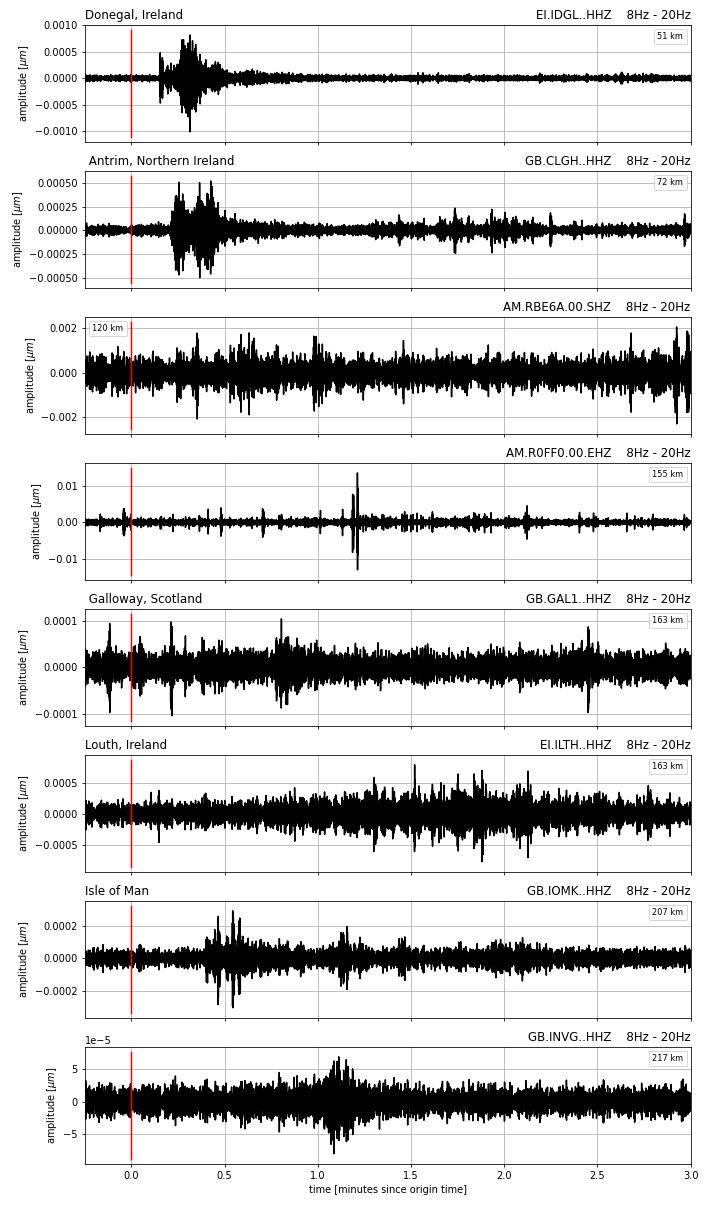

In [50]:
# Chose the length of the seimograms, in seconds:
length = 195 # ~180 for local events
# Chose how many seconds of data you want to plot before the event time:
pretime = 15 # ~15 for local events
# chose amplitude parameter ('counts', 'disp': displacement, 'vel': velocity, 'acc': acceleration)
correct = 'disp'
# chose filter settings  (number or 'none')
freqmin = 8    # 4 to 8 for local events
freqmax = 20   # try 10 to 20 for local events
# Lets plot seismograms:
INSN.plot(nslc, correct, t0, length, pretime, R_hypos, freqmin, freqmax)